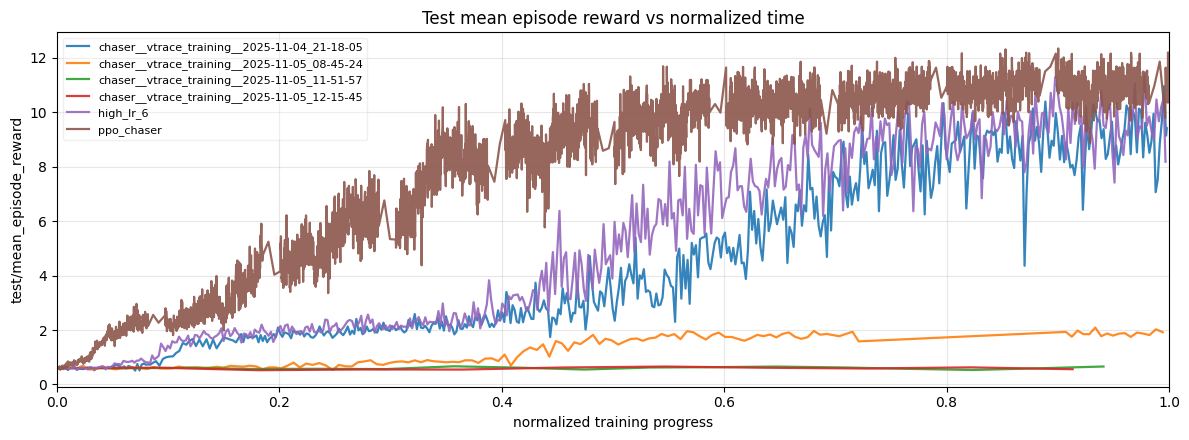

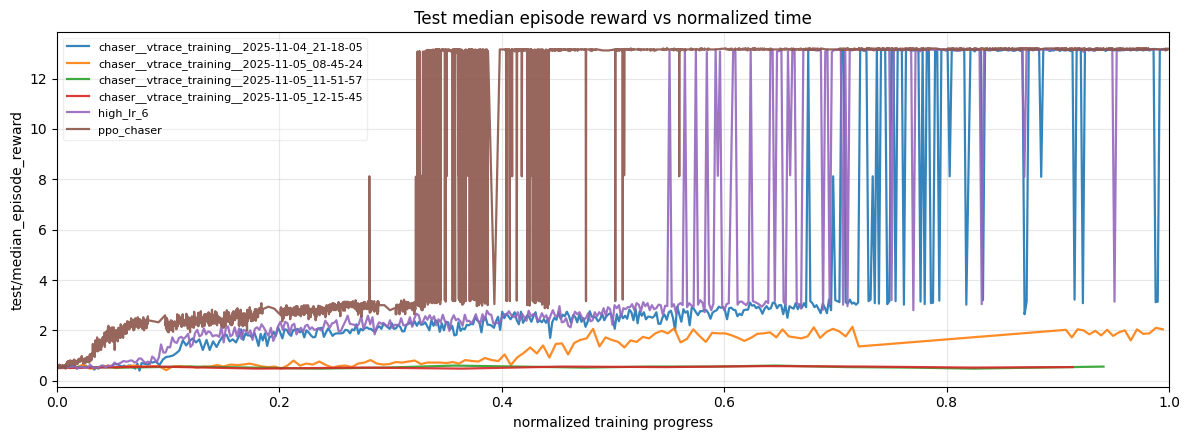

In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

root_dir = "./outputs"
csv_name = "sit_format.csv"

time_candidates = [
    "time",
    "timestamp",
    "wall_time",
    "train/total_time"
]

y_mean = "test/mean_episode_reward"
y_median = "test/median_episode_reward"

def find_run_csvs(root):
    paths = []
    for dirpath, dirnames, filenames in os.walk(root):
        if csv_name in filenames:
            paths.append(os.path.join(dirpath, csv_name))
    return sorted(paths)

def infer_run_name(path, root):
    rel = os.path.relpath(os.path.dirname(path), root)
    return rel.replace("\\", "/")

def to_seconds(series):
    if series is None:
        return None
    if pd.api.types.is_numeric_dtype(series):
        return pd.to_numeric(series, errors="coerce").astype(float).values
    parsed = pd.to_datetime(series, errors="coerce", utc=True)
    if parsed.notna().any():
        return parsed.view("int64") / 1e9
    s = series.astype(str)
    if s.str.contains(":").any():
        def parse_duration(x):
            try:
                parts = [float(p) for p in str(x).split(":")]
                if len(parts) == 3:
                    return parts[0]*3600 + parts[1]*60 + parts[2]
                if len(parts) == 2:
                    return parts[0]*60 + parts[1]
            except:
                return np.nan
            return np.nan
        return s.map(parse_duration).values
    return pd.to_numeric(series, errors="coerce").values

def pick_time_column(df):
    for c in time_candidates:
        if c in df.columns:
            return c
    return None

def build_time_seconds(df):
    tcol = pick_time_column(df)
    if tcol is not None:
        t = to_seconds(df[tcol])
    elif "train/total_time" in df.columns:
        t = to_seconds(df["train/total_time"])
    else:
        t = np.arange(len(df), dtype=float)
    if t is None or np.all(~np.isfinite(t)):
        t = np.arange(len(df), dtype=float)
    t = np.array(t, dtype=float)
    if np.isfinite(t).any():
        t0 = np.nanmin(t)
        if np.isfinite(t0) and t0 != 0:
            t = t - t0
    return t

def normalize_time_per_run(t, df):
    if "train/total_time" in df.columns:
        total = np.nanmax(to_seconds(df["train/total_time"]))
    else:
        total = np.nanmax(t)
    if not np.isfinite(total) or total <= 0:
        total = np.nanmax(t)
    if not np.isfinite(total) or total <= 0:
        total = 1.0
    return np.clip(t / float(total), 0.0, np.inf)

def load_runs(root):
    paths = find_run_csvs(root)
    data = []
    for p in paths:
        try:
            df = pd.read_csv(p)
            if y_mean not in df.columns and y_median not in df.columns:
                continue
            t = build_time_seconds(df)
            tn = normalize_time_per_run(t, df)
            run = infer_run_name(p, root)
            sub = pd.DataFrame({
                "run": run,
                "t_norm": tn,
                y_mean: pd.to_numeric(df.get(y_mean, np.nan), errors="coerce"),
                y_median: pd.to_numeric(df.get(y_median, np.nan), errors="coerce"),
            })
            sub = sub.sort_values("t_norm")
            data.append(sub)
        except Exception:
            continue
    if not data:
        return pd.DataFrame()
    return pd.concat(data, ignore_index=True)

df = load_runs(root_dir)

if df.empty:
    print(f"No sit_format.csv files with test rewards found under: {root_dir}")
else:
    runs = df["run"].unique().tolist()

    plt.figure(figsize=(12, 4.5))
    for r in runs:
        d = df[df["run"] == r]
        x = d["t_norm"].values
        y = d[y_mean].values
        if np.all(np.isnan(y)):
            continue
        plt.plot(x, y, label=r, linewidth=1.6, alpha=0.9)
    plt.xlabel("normalized training progress")
    plt.ylabel("test/mean_episode_reward")
    plt.title("Test mean episode reward vs normalized time")
    plt.xlim(0, max(1.0, np.nanmax(df["t_norm"].values)))
    plt.grid(True, alpha=0.3)
    plt.legend(loc="best", fontsize=8, framealpha=0.3)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 4.5))
    for r in runs:
        d = df[df["run"] == r]
        x = d["t_norm"].values
        y = d[y_median].values
        if np.all(np.isnan(y)):
            continue
        plt.plot(x, y, label=r, linewidth=1.6, alpha=0.9)
    plt.xlabel("normalized training progress")
    plt.ylabel("test/median_episode_reward")
    plt.title("Test median episode reward vs normalized time")
    plt.xlim(0, max(1.0, np.nanmax(df["t_norm"].values)))
    plt.grid(True, alpha=0.3)
    plt.legend(loc="best", fontsize=8, framealpha=0.3)
    plt.tight_layout()
    plt.show()


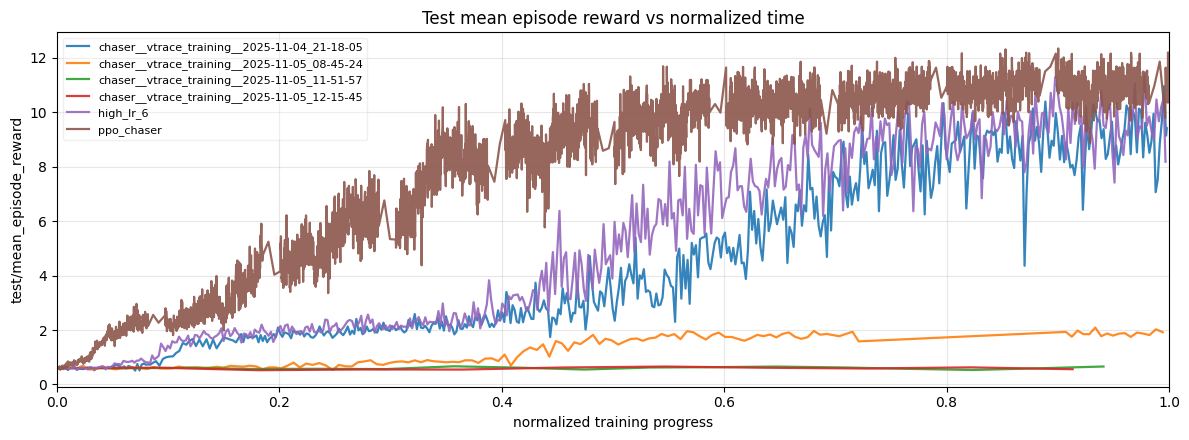

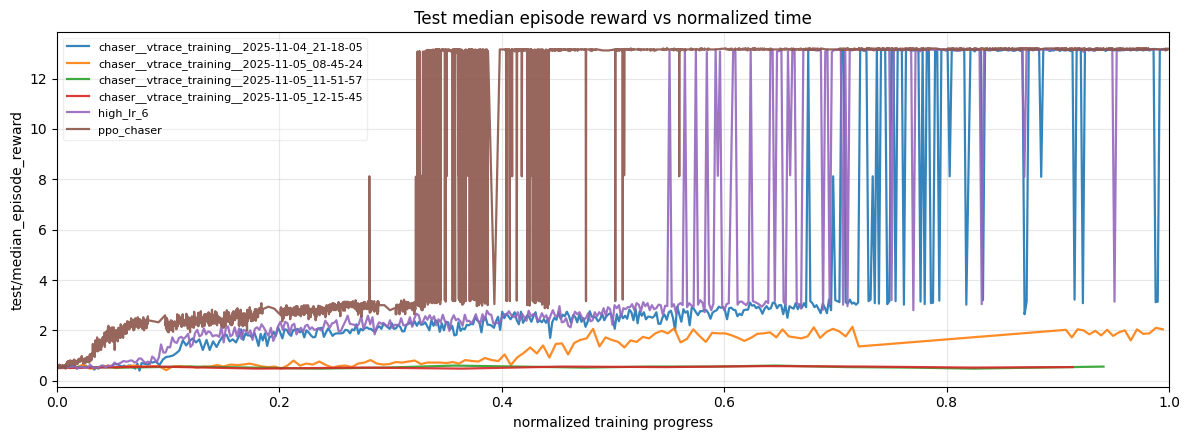

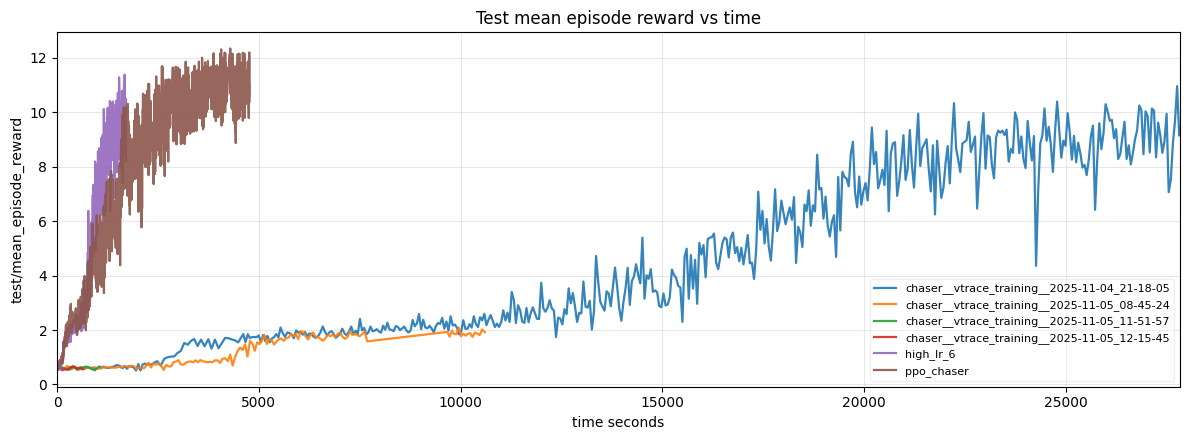

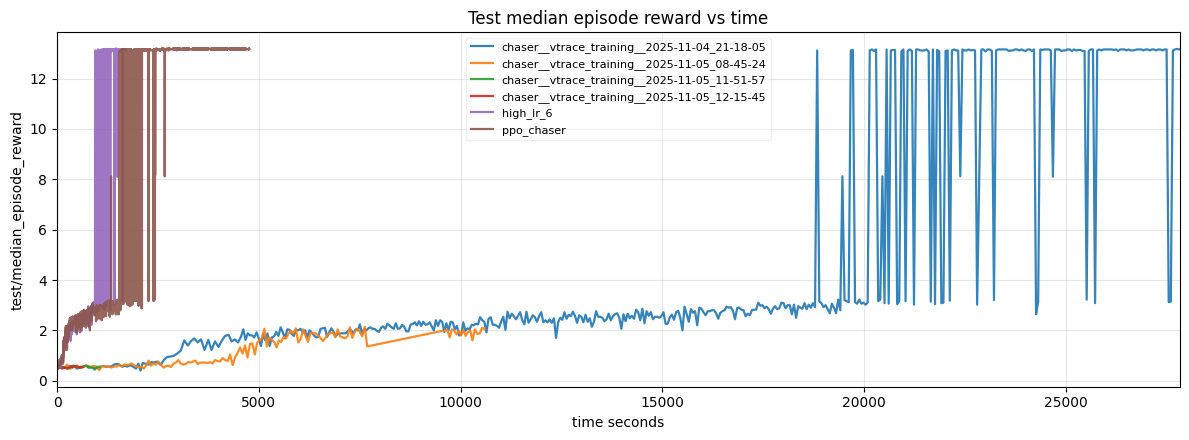

In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

root_dir = "./outputs"
csv_name = "sit_format.csv"

time_candidates = [
    "time",
    "timestamp",
    "wall_time",
    "train/total_time"
]

y_mean = "test/mean_episode_reward"
y_median = "test/median_episode_reward"

def find_run_csvs(root):
    paths = []
    for dirpath, dirnames, filenames in os.walk(root):
        if csv_name in filenames:
            paths.append(os.path.join(dirpath, csv_name))
    return sorted(paths)

def infer_run_name(path, root):
    rel = os.path.relpath(os.path.dirname(path), root)
    return rel.replace("\\", "/")

def to_seconds(series):
    if series is None:
        return None
    if pd.api.types.is_numeric_dtype(series):
        return pd.to_numeric(series, errors="coerce").astype(float).values
    parsed = pd.to_datetime(series, errors="coerce", utc=True)
    if parsed.notna().any():
        return parsed.view("int64") / 1e9
    s = series.astype(str)
    if s.str.contains(":").any():
        def parse_duration(x):
            try:
                parts = [float(p) for p in str(x).split(":")]
                if len(parts) == 3:
                    return parts[0]*3600 + parts[1]*60 + parts[2]
                if len(parts) == 2:
                    return parts[0]*60 + parts[1]
            except:
                return np.nan
            return np.nan
        return s.map(parse_duration).values
    return pd.to_numeric(series, errors="coerce").values

def pick_time_column(df):
    for c in time_candidates:
        if c in df.columns:
            return c
    return None

def build_time_seconds(df):
    tcol = pick_time_column(df)
    if tcol is not None:
        t = to_seconds(df[tcol])
    elif "train/total_time" in df.columns:
        t = to_seconds(df["train/total_time"])
    else:
        t = np.arange(len(df), dtype=float)
    if t is None or np.all(~np.isfinite(t)):
        t = np.arange(len(df), dtype=float)
    t = np.array(t, dtype=float)
    if np.isfinite(t).any():
        t0 = np.nanmin(t)
        if np.isfinite(t0) and t0 != 0:
            t = t - t0
    return t

def normalize_time_per_run(t, df):
    if "train/total_time" in df.columns:
        total = np.nanmax(to_seconds(df["train/total_time"]))
    else:
        total = np.nanmax(t)
    if not np.isfinite(total) or total <= 0:
        total = np.nanmax(t)
    if not np.isfinite(total) or total <= 0:
        total = 1.0
    return np.clip(t / float(total), 0.0, np.inf)

def load_runs(root):
    paths = find_run_csvs(root)
    data = []
    for p in paths:
        try:
            df = pd.read_csv(p)
            if y_mean not in df.columns and y_median not in df.columns:
                continue
            t = build_time_seconds(df)
            tn = normalize_time_per_run(t, df)
            run = infer_run_name(p, root)
            sub = pd.DataFrame({
                "run": run,
                "t": t,
                "t_norm": tn,
                y_mean: pd.to_numeric(df.get(y_mean, np.nan), errors="coerce"),
                y_median: pd.to_numeric(df.get(y_median, np.nan), errors="coerce"),
            })
            sub = sub.sort_values("t_norm")
            data.append(sub)
        except Exception:
            continue
    if not data:
        return pd.DataFrame()
    return pd.concat(data, ignore_index=True)

df = load_runs(root_dir)

if df.empty:
    print(f"No sit_format.csv files with test rewards found under: {root_dir}")
else:
    runs = df["run"].unique().tolist()

    plt.figure(figsize=(12, 4.5))
    for r in runs:
        d = df[df["run"] == r]
        x = d["t_norm"].values
        y = d[y_mean].values
        if np.all(np.isnan(y)):
            continue
        plt.plot(x, y, label=r, linewidth=1.6, alpha=0.9)
    plt.xlabel("normalized training progress")
    plt.ylabel("test/mean_episode_reward")
    plt.title("Test mean episode reward vs normalized time")
    plt.xlim(0, max(1.0, np.nanmax(df["t_norm"].values)))
    plt.grid(True, alpha=0.3)
    plt.legend(loc="best", fontsize=8, framealpha=0.3)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 4.5))
    for r in runs:
        d = df[df["run"] == r]
        x = d["t_norm"].values
        y = d[y_median].values
        if np.all(np.isnan(y)):
            continue
        plt.plot(x, y, label=r, linewidth=1.6, alpha=0.9)
    plt.xlabel("normalized training progress")
    plt.ylabel("test/median_episode_reward")
    plt.title("Test median episode reward vs normalized time")
    plt.xlim(0, max(1.0, np.nanmax(df["t_norm"].values)))
    plt.grid(True, alpha=0.3)
    plt.legend(loc="best", fontsize=8, framealpha=0.3)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 4.5))
    for r in runs:
        d = df[df["run"] == r].sort_values("t")
        x = d["t"].values
        y = d[y_mean].values
        if np.all(np.isnan(y)):
            continue
        plt.plot(x, y, label=r, linewidth=1.6, alpha=0.9)
    plt.xlabel("time seconds")
    plt.ylabel("test/mean_episode_reward")
    plt.title("Test mean episode reward vs time")
    xmax = np.nanmax(df["t"].values)
    if np.isfinite(xmax):
        plt.xlim(0, xmax)
    plt.grid(True, alpha=0.3)
    plt.legend(loc="best", fontsize=8, framealpha=0.3)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 4.5))
    for r in runs:
        d = df[df["run"] == r].sort_values("t")
        x = d["t"].values
        y = d[y_median].values
        if np.all(np.isnan(y)):
            continue
        plt.plot(x, y, label=r, linewidth=1.6, alpha=0.9)
    plt.xlabel("time seconds")
    plt.ylabel("test/median_episode_reward")
    plt.title("Test median episode reward vs time")
    xmax = np.nanmax(df["t"].values)
    if np.isfinite(xmax):
        plt.xlim(0, xmax)
    plt.grid(True, alpha=0.3)
    plt.legend(loc="best", fontsize=8, framealpha=0.3)
    plt.tight_layout()
    plt.show()


In [1]:
# Single Jupyter cell: generate and display one static Procgen Fruitbot frame (no pygame)

# !pip install -q procgen Pillow  # uncomment if not installed

import numpy as np
from procgen import ProcgenGym
from PIL import Image
from IPython.display import display

# Configure a deterministic single level
env = ProcgenGym(
    num_envs=1,
    env_name="fruitbot",
    render_mode="rgb_array",
    distribution_mode="easy",
    start_level=0,     # choose a specific level index
    num_levels=1,      # only one level
    center_agent=False,
    use_backgrounds=True,
    rand_seed=42       # deterministic seed
)

# Reset and grab the first observation frame
obs = env.reset()
frame = obs["obs"][0]  # (64, 64, 3) uint8

# Optional: upscale for clearer display
img = Image.fromarray(frame).resize((256, 256), Image.NEAREST)

# Display in notebook
display(img)

env.close()



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\sandr\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\sandr\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\sandr\untracked_folder\RL25-project-19\.venv\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\sandr\untracked_folder\RL25-project-19\.venv\lib\site-packages\traitle

AttributeError: _ARRAY_API not found

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


ImportError: cannot import name 'ProcgenGym' from 'procgen' (C:\Users\sandr\untracked_folder\RL25-project-19\.venv\lib\site-packages\procgen\__init__.py)